# Imports & Config

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Style plot
plt.style.use('default')
font = {'size' : 32}
plt.rc('font', **font)
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

# Define functions

In [3]:
def get_percentage_df(df):
    df_perc = df[df['verified'] == True].groupby('millis').mean()
    df_perc['percentage_solved'] = 0.0
    size = df.shape[0]
    print("Dataframe contains " + str(size) + " elements")

    for index, row in df_perc.iterrows():
        df_solved = df[df['verified'] == True]
        num_solved = df_solved[df_solved['millis'] <= index].shape[0]
        percentage_solved = num_solved / df.shape[0]
        df_perc.at[index, 'percentage_solved'] = percentage_solved
    df_perc.at[180000, 'percentage_solved'] = df[df['verified'] == True].shape[0] / df.shape[0]

    return df_perc

def get_heuristic_percentage_df(df):
    df_perc = df.groupby('difference').mean()
    df_perc['percentage_solved'] = 0.0
    size = df.shape[0]
    print("Dataframe contains " + str(size) + " elements")

    for index, row in df_perc.iterrows():
        num_solved = df[df['difference'] <= index].shape[0]
        percentage_solved = num_solved / df.shape[0]
        df_perc.at[index, 'percentage_solved'] = percentage_solved
    #df_perc.at[180000, 'percentage_solved'] = df[df['verified'] == True].shape[0] / df.shape[0]

    return df_perc

def add_percentage_df(df_perc, df_add):
    df_perc['percentage_solved_y'] = 0.0
    for index, row in df_perc.iterrows():
        df_solved = df_add[df_add['verified'] == True]
        num_solved = df_solved[df_solved['millis'] <= index].shape[0]
        percentage_solved = num_solved / df_add.shape[0]
        df_perc.at[index, 'percentage_solved_y'] = percentage_solved
    df_perc.at[180000, 'percentage_solved_y'] = df_add[df_add['verified'] == True].shape[0] / df_add.shape[0]
    return df_perc

def split_synthetic_complex(df):
    df_synthetic = df[df['name'].str.match('synth')]
    df_complex = df[~df['name'].str.match('synth')]
    return df_synthetic, df_complex

def print_results(name, df):
    print("Results for '" + name + "':")
    df_synthetic, df_complex = split_synthetic_complex(df)
    num_synthetic = df_synthetic.shape[0]
    df_synthetic_solved = df_synthetic[df_synthetic['verified'] == True]
    num_synthetic_solved = df_synthetic_solved.shape[0]
    percentage_solved = num_synthetic_solved * 100 / num_synthetic if num_synthetic else 100
    print("Synthetic: " + str(num_synthetic_solved) + "/" + str(num_synthetic) + " (" + str(round(percentage_solved, 2)) + "%)")

    num_complex = df_complex.shape[0]
    df_complex_solved = df_complex[df_complex['verified'] == True]
    num_complex_solved = df_complex_solved.shape[0]
    percentage_solved = num_complex_solved * 100 / num_complex if num_complex else 100
    print("Complex: " + str(num_complex_solved) + "/" + str(num_complex) + " (" + str(round(percentage_solved, 2)) + "%)")

    num_overall = df.shape[0]
    df_solved = df[df['verified'] == True]
    num_solved = df_solved.shape[0]
    percentage_solved = num_solved * 100 / num_overall if num_overall else 100
    print("Overall: " + str(num_solved) + "/" + str(num_overall) + " (" + str(round(percentage_solved, 2)) + "%)")
    print()

# Load Data

In [50]:
# Worst solution
dfh_0 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-WorstSolution.csv", sep=",", header=0)
dfh_0['difference'] = dfh_0['k_approx'] / dfh_0['k_optimal']

# DFAS Greedy
dfh_a1 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_1_MinIn.csv", sep=",", header=0)
dfh_a1['difference'] = dfh_a1['k_approx'] / dfh_a1['k_optimal']
dfh_a2 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_2_MaxOut.csv", sep=",", header=0)
dfh_a2['difference'] = dfh_a2['k_approx'] / dfh_a2['k_optimal']
dfh_a3 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_3_MinInMaxOut.csv", sep=",", header=0)
dfh_a3['difference'] = dfh_a3['k_approx'] / dfh_a3['k_optimal']

# DFAS Greedy + Shift
dfh_a5 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_5_MinIn+Shift.csv", sep=",", header=0)
dfh_a5['difference'] = dfh_a5['k_approx'] / dfh_a5['k_optimal']
dfh_a6 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_6_MaxOut+Shift.csv", sep=",", header=0)
dfh_a6['difference'] = dfh_a6['k_approx'] / dfh_a6['k_optimal']
dfh_a7 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFAS_7_MinInMaxOut+Shift.csv", sep=",", header=0)
dfh_a7['difference'] = dfh_a7['k_approx'] / dfh_a7['k_optimal']

# DFVS Nodes Heuristic
dfh_v1 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_1_MaxIn.csv", sep=",", header=0)
dfh_v1['difference'] = dfh_v1['k_approx'] / dfh_v1['k_optimal']
dfh_v2 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_2_MaxOut.csv", sep=",", header=0)
dfh_v2['difference'] = dfh_v2['k_approx'] / dfh_v2['k_optimal']
dfh_v3 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_3_MaxInPlusOut.csv", sep=",", header=0)
dfh_v3['difference'] = dfh_v3['k_approx'] / dfh_v3['k_optimal']
dfh_v4 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_4_MaxMinInOut.csv", sep=",", header=0)
dfh_v4['difference'] = dfh_v4['k_approx'] / dfh_v4['k_optimal']

# DFVS Cycles Heuristic
dfh_v5 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_5_LightBFS.csv", sep=",", header=0)
dfh_v5['difference'] = dfh_v5['k_approx'] / dfh_v5['k_optimal']
dfh_v6 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_6_FullBFS.csv", sep=",", header=0)
dfh_v6['difference'] = dfh_v6['k_approx'] / dfh_v6['k_optimal']
dfh_v7 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_7_FullBFSMultiple.csv", sep=",", header=0)
dfh_v7['difference'] = dfh_v7['k_approx'] / dfh_v7['k_optimal']

# DFVS Timer Heuristics
dfh_v8 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_8_TimerFast100.csv", sep=",", header=0)
dfh_v8['difference'] = dfh_v8['k_approx'] / dfh_v8['k_optimal']
dfh_v9 = pd.read_csv("../logs/v5/heuristics/HeuristicLog-DFVS_9_TimerFast1000.csv", sep=",", header=0)
dfh_v9['difference'] = dfh_v9['k_approx'] / dfh_v9['k_optimal']

# Create performance dataframes
df_v3 = pd.read_csv("../logs/v3/MainLog-3.2_UpdatePacking.csv", sep=",", header=0) # V3 Packing (with updates)
df_v4 = pd.read_csv("../logs/v4/ILPLog-4.11_LazyCyclesDoublePacking.csv", sep=",", header=0) # V4 ILP Lazy Cycles
df_0 = pd.read_csv("../logs/MainLog-5.0.csv", sep=",", header=0)
df_1 = pd.read_csv("../logs/MainLog_5.1_FinalImprovements.csv", sep=",", header=0)
df_2 = pd.read_csv("../logs/MainLog_10000-.csv", sep=",", header=0)
df_new = pd.read_csv("../logs/v5/MainLog-1000-0.5.csv", sep=",", header=0)


# Print Results

In [51]:
print_results('V3 Update Packing', df_v3)
print_results('V4 ILP Lazy Cycles', df_v4)
print_results('Mainlog Improved BFS', df_0)
print_results('Mainlog Final Improvement', df_1)
print_results('Mainlog', df_2)
print_results('New', df_new)

Results for 'V3 Update Packing':
Synthetic: 233/315 (73.97%)
Complex: 112/137 (81.75%)
Overall: 345/452 (76.33%)

Results for 'V4 ILP Lazy Cycles':
Synthetic: 297/315 (94.29%)
Complex: 126/137 (91.97%)
Overall: 423/452 (93.58%)

Results for 'Mainlog Improved BFS':
Synthetic: 268/315 (85.08%)
Complex: 114/137 (83.21%)
Overall: 382/452 (84.51%)

Results for 'Mainlog Final Improvement':
Synthetic: 288/315 (91.43%)
Complex: 113/137 (82.48%)
Overall: 401/452 (88.72%)

Results for 'Mainlog':
Synthetic: 295/315 (93.65%)
Complex: 113/137 (82.48%)
Overall: 408/452 (90.27%)

Results for 'New':
Synthetic: 294/315 (93.33%)
Complex: 113/137 (82.48%)
Overall: 407/452 (90.04%)



# DFAS Heuristic Line Plot

Dataframe contains 423 elements
Dataframe contains 423 elements
Dataframe contains 423 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_21224/4277505089.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


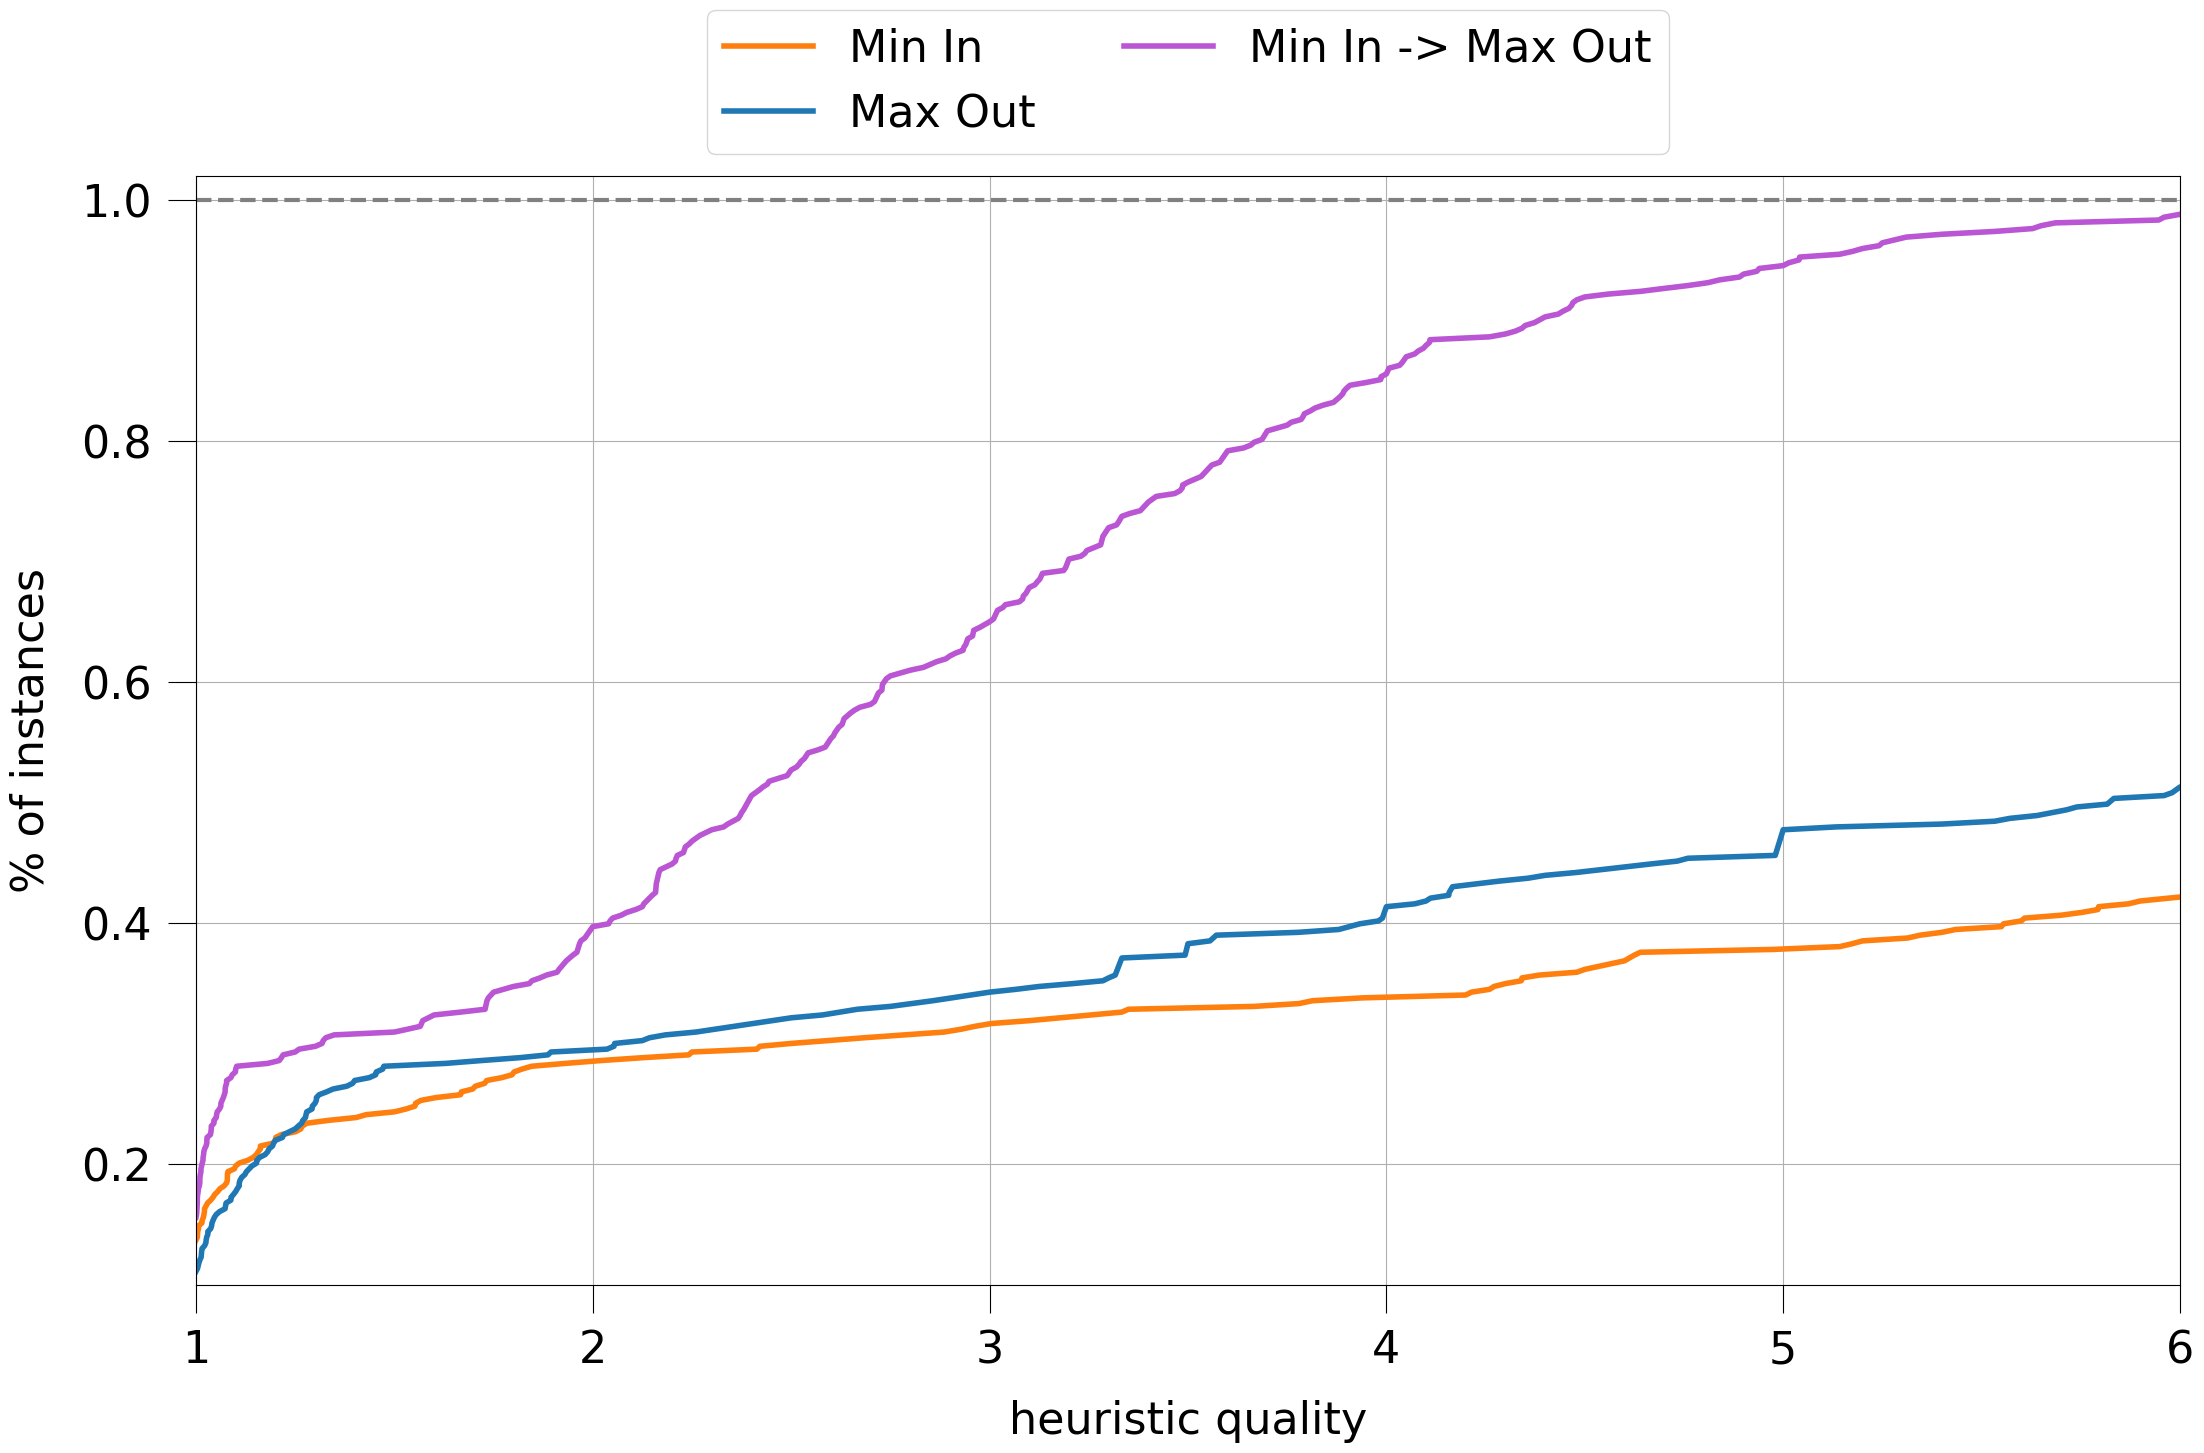

In [41]:
# Calculate percentage dataframes
df_0_perc = get_heuristic_percentage_df(dfh_a1)
df_1_perc = get_heuristic_percentage_df(dfh_a2)
df_2_perc = get_heuristic_percentage_df(dfh_a3)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_0_perc['percentage_solved'], c='tab:orange', linewidth='4', label='Min In')
ax.plot(df_1_perc['percentage_solved'], c='tab:blue', linewidth='4', label='Max Out')
ax.plot(df_2_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='Min In -> Max Out')

ax.set_xlabel('heuristic quality', labelpad=20)
ax.set_ylabel('% of instances', labelpad=20)
ax.set_xlim([1.0, 6])
ax.set_ylim([0.1, 1.02])
#ax.set_xscale('log')
#ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
#ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
#ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
#ax.text(185000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v5/HeuristicLinePlot.png',  bbox_inches='tight')
fig.show()

# DFVS Greedy Heuristic Line Plot

Dataframe contains 423 elements
Dataframe contains 423 elements
Dataframe contains 423 elements
Dataframe contains 423 elements
Dataframe contains 423 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_21224/2771202483.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


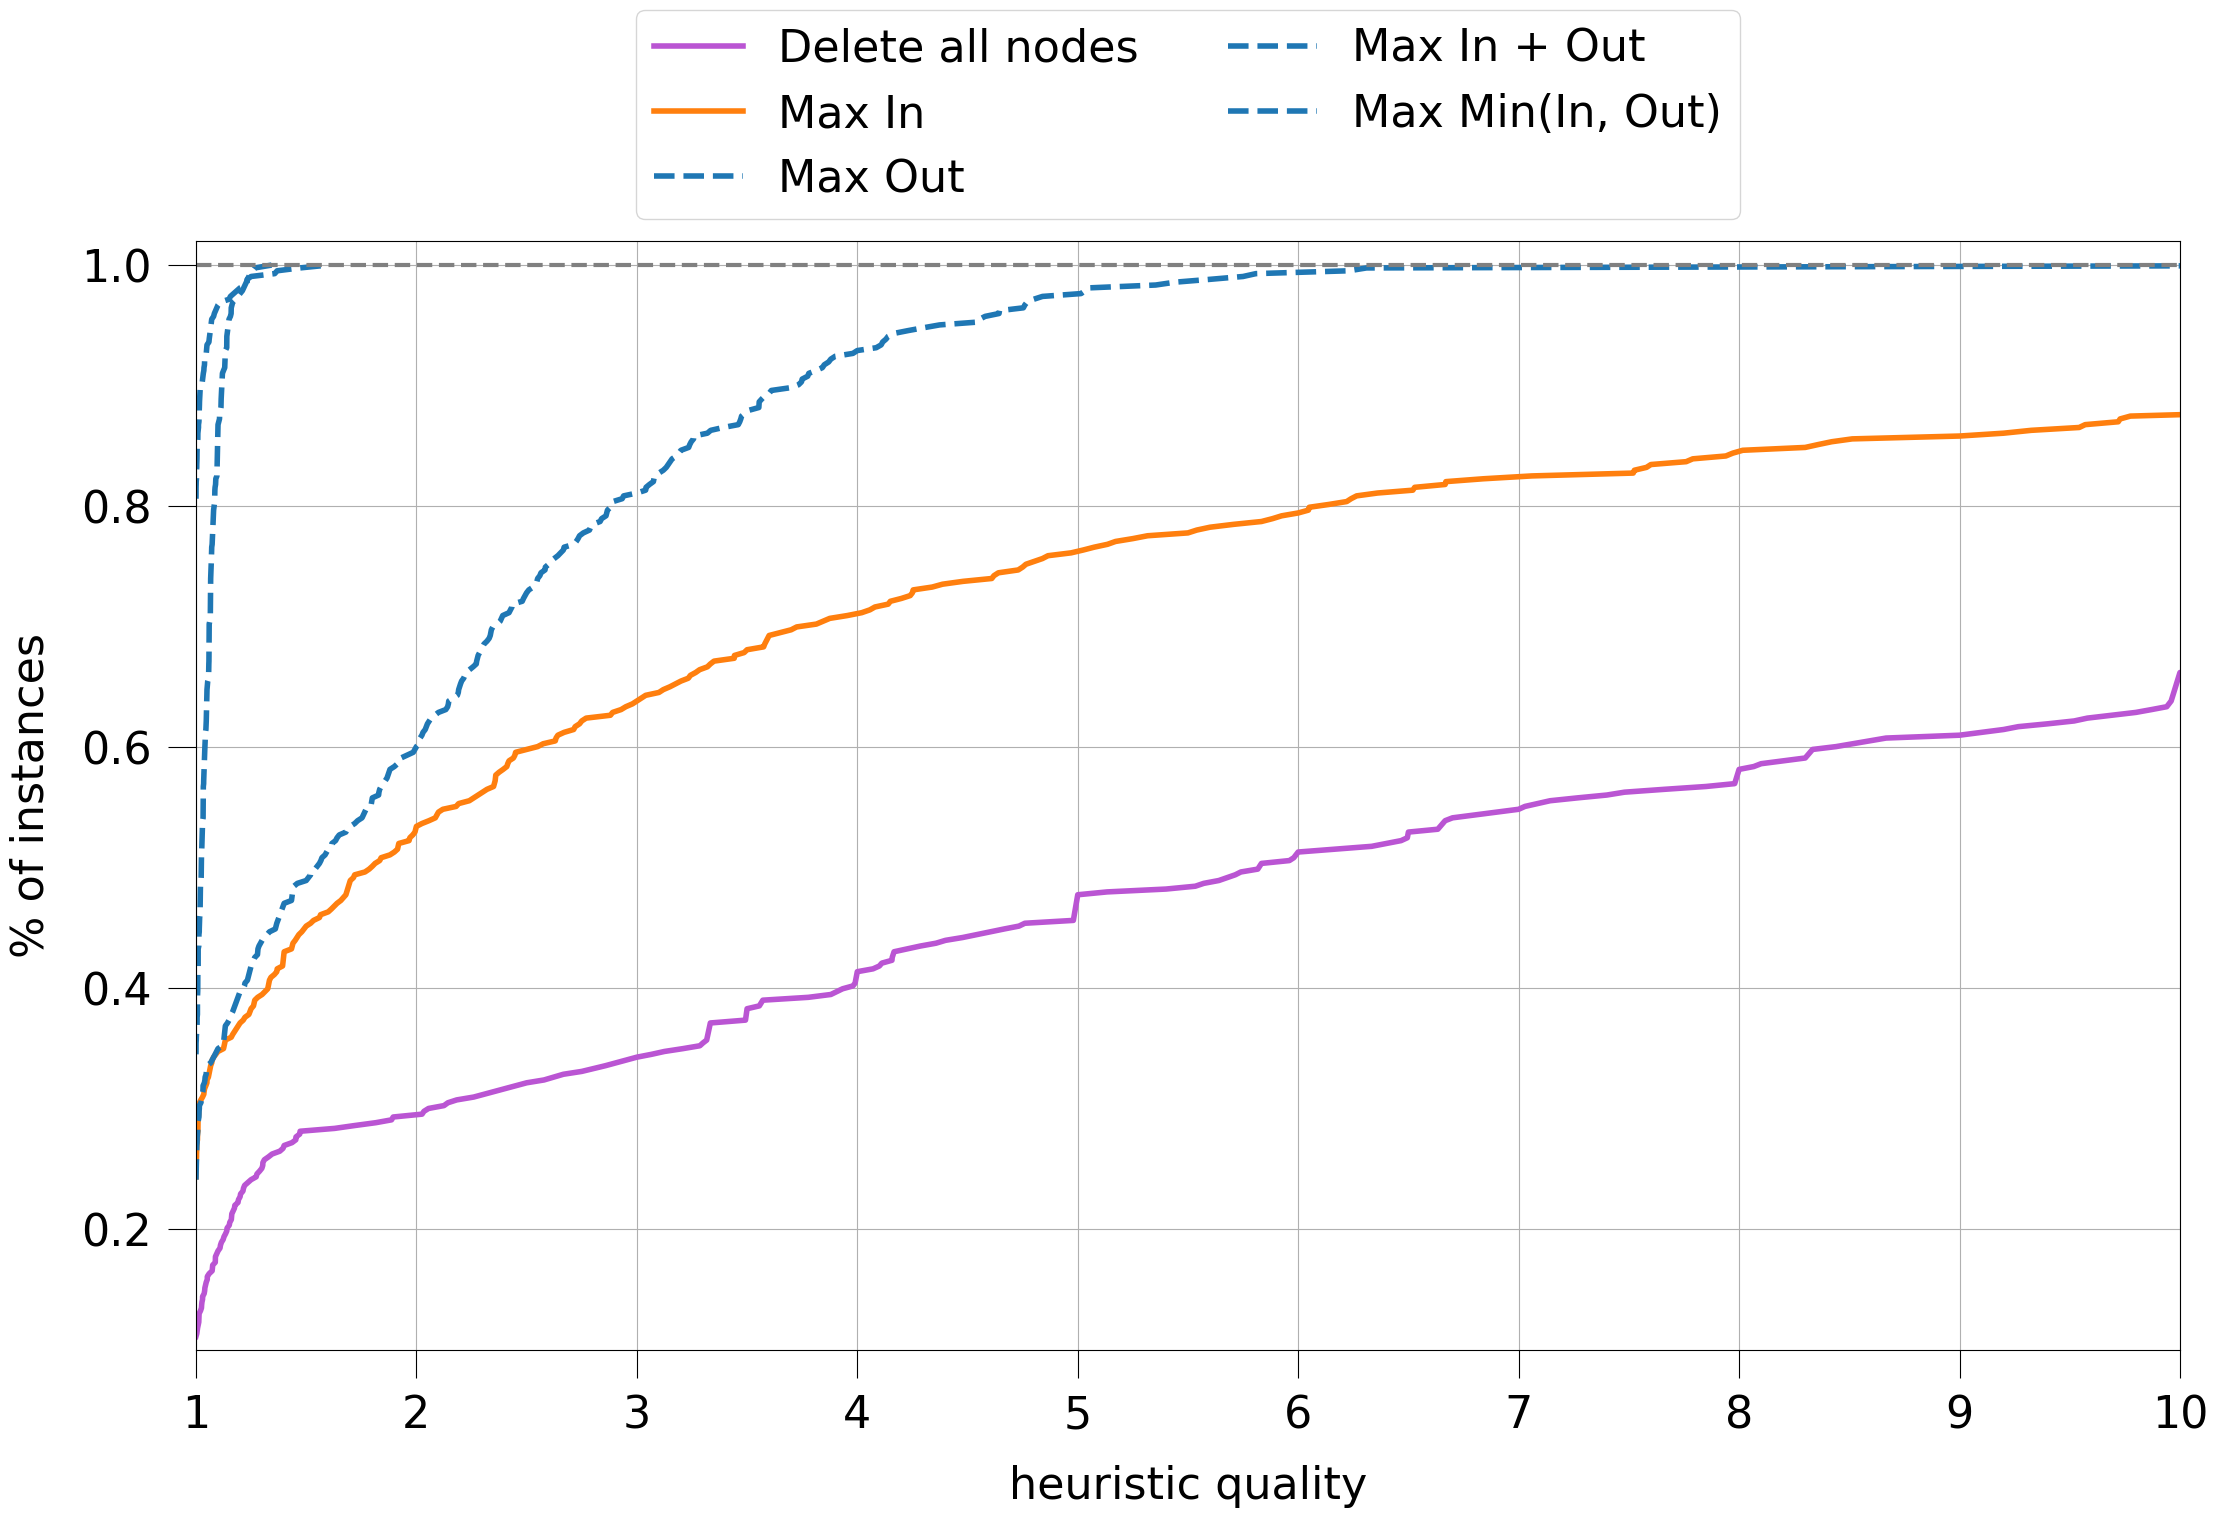

In [27]:
# Calculate percentage dataframes
df_0_perc = get_heuristic_percentage_df(dfh_0)
df_1_perc = get_heuristic_percentage_df(dfh_v1)
df_2_perc = get_heuristic_percentage_df(dfh_v2)
df_3_perc = get_heuristic_percentage_df(dfh_v3)
df_4_perc = get_heuristic_percentage_df(dfh_v4)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_0_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='Delete all nodes')
ax.plot(df_1_perc['percentage_solved'], c='tab:orange', linewidth='4', label='Max In')
ax.plot(df_2_perc['percentage_solved'], c='tab:blue', linestyle='--', linewidth='4', label='Max Out')
ax.plot(df_3_perc['percentage_solved'], c='tab:blue', linestyle='--', linewidth='4', label='Max In + Out')
ax.plot(df_4_perc['percentage_solved'], c='tab:blue', linestyle='--', linewidth='4', label='Max Min(In, Out)')

ax.set_xlabel('heuristic quality', labelpad=20)
ax.set_ylabel('% of instances', labelpad=20)
ax.set_xlim([1.0, 10])
ax.set_ylim([0.1, 1.02])
#ax.set_xscale('log')
#ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
#ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
#ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
#ax.text(185000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v5/DFVSNodesHeuristicLinePlot.png',  bbox_inches='tight')
fig.show()

# DFVS Cycles Heuristic Line Plot

Dataframe contains 423 elements
Dataframe contains 423 elements
Dataframe contains 423 elements
Dataframe contains 423 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_21224/2910851383.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


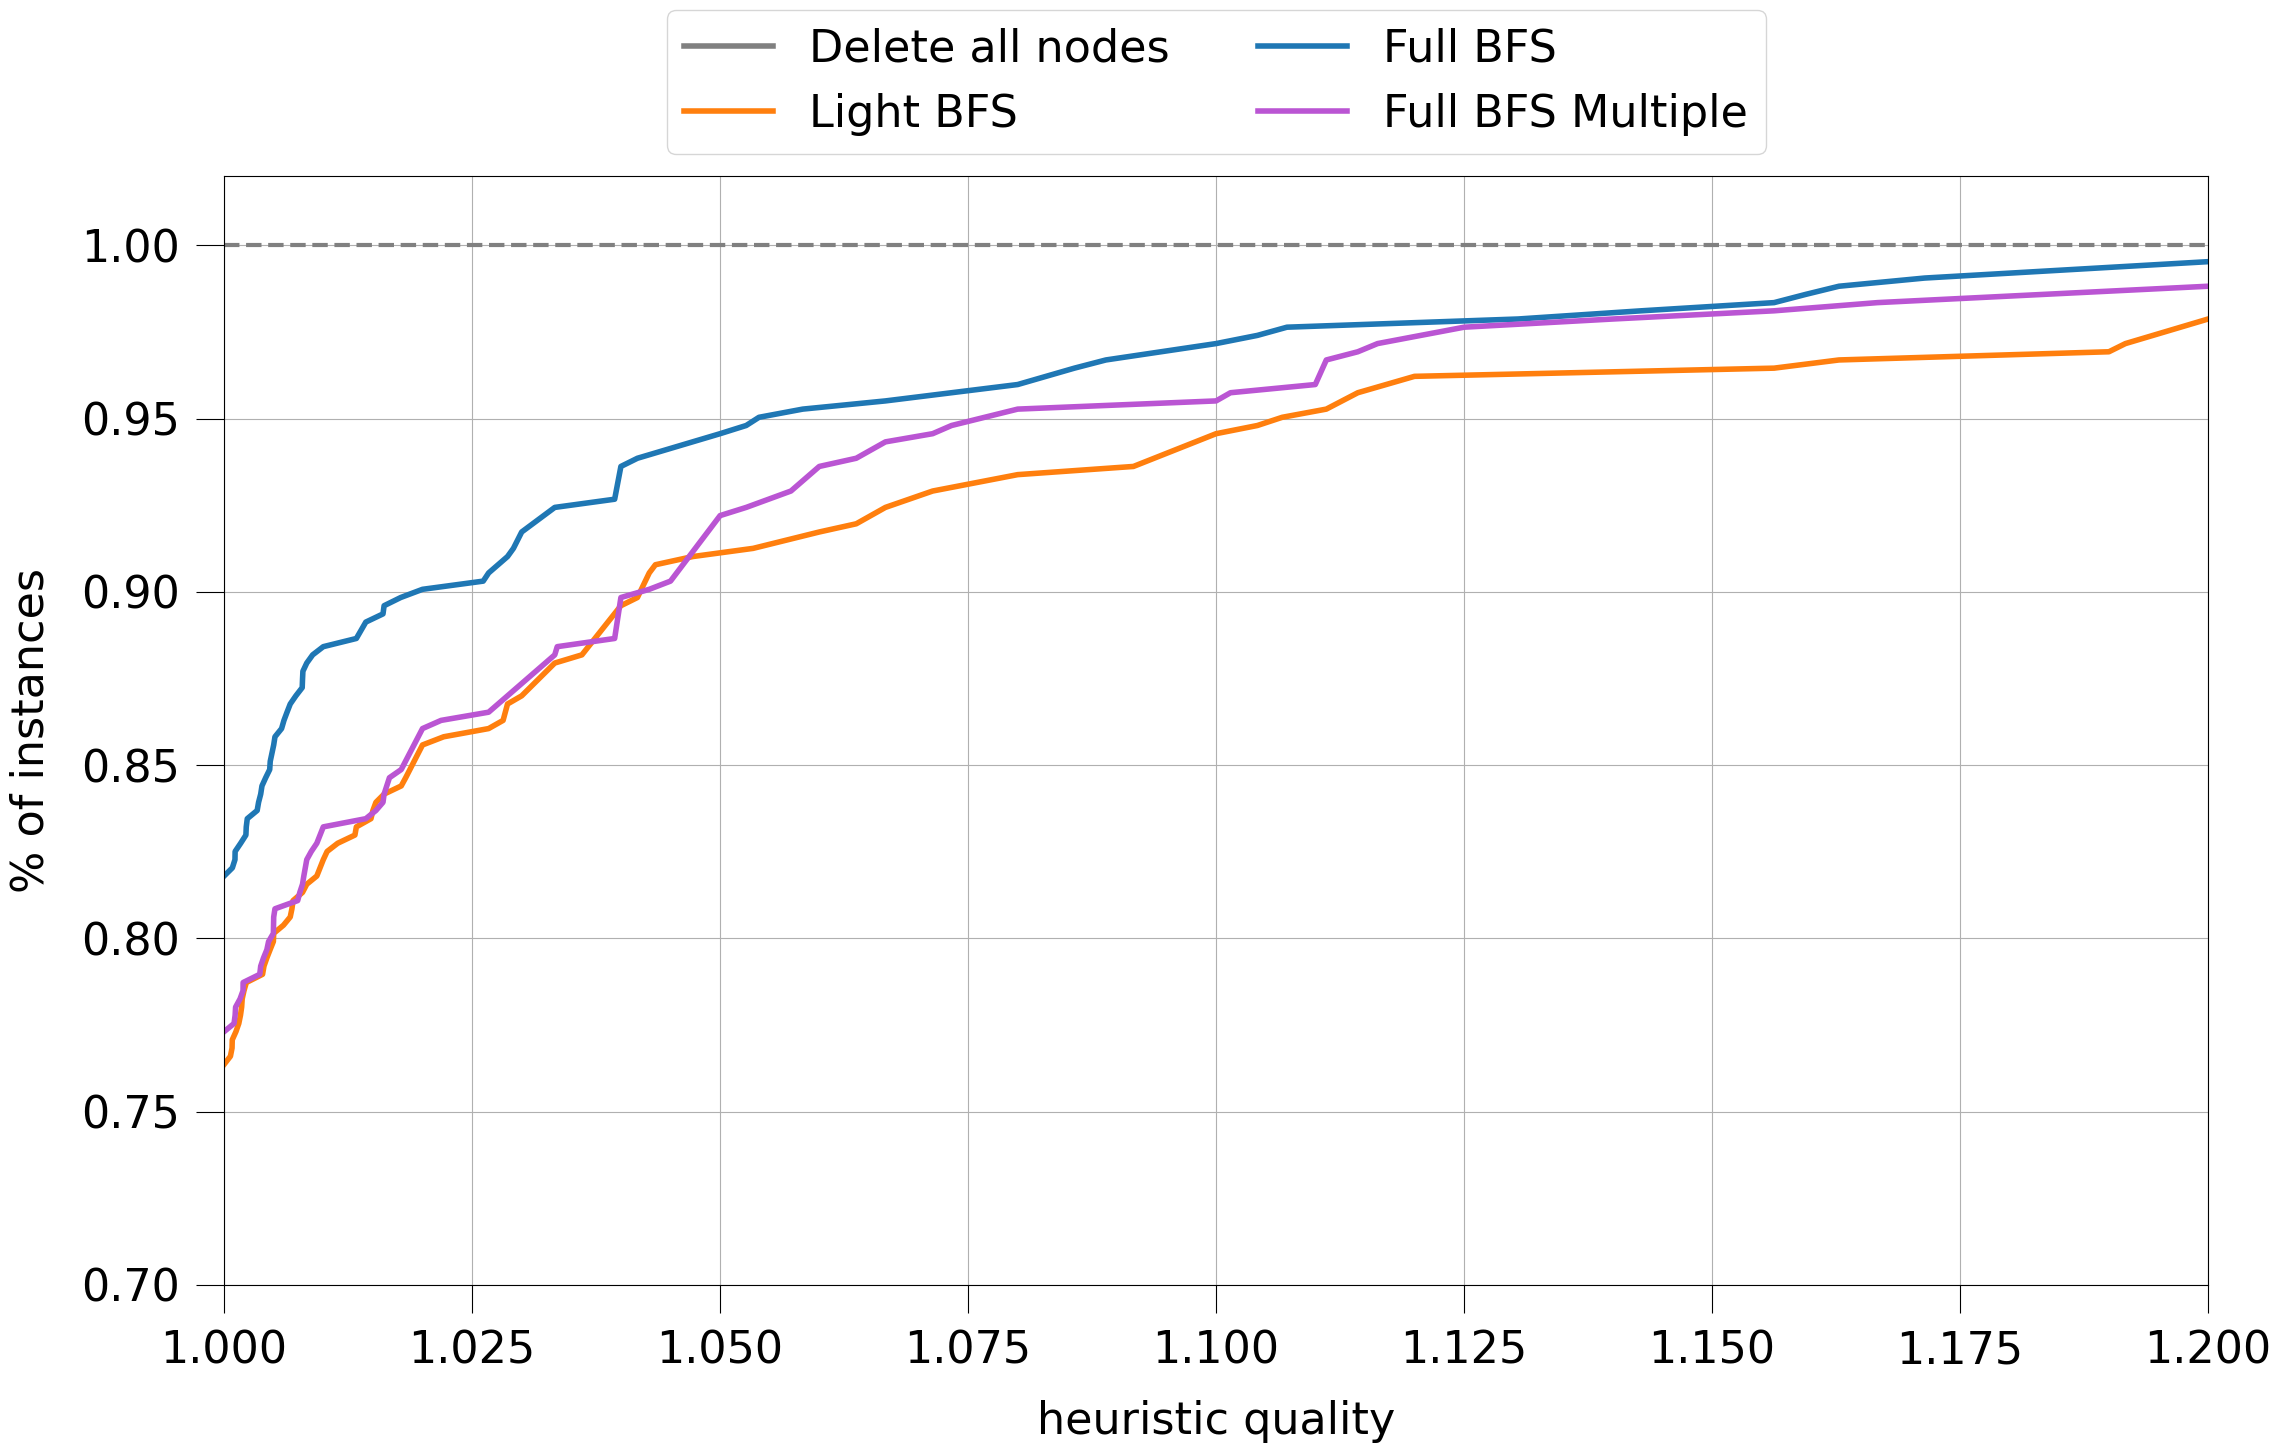

In [33]:
# Calculate percentage dataframes
df_0_perc = get_heuristic_percentage_df(dfh_0)
df_1_perc = get_heuristic_percentage_df(dfh_v5)
df_2_perc = get_heuristic_percentage_df(dfh_v6)
df_3_perc = get_heuristic_percentage_df(dfh_v7)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_0_perc['percentage_solved'], c='gray', linewidth='4', label='Delete all nodes')
ax.plot(df_1_perc['percentage_solved'], c='tab:orange', linewidth='4', label='Light BFS')
ax.plot(df_2_perc['percentage_solved'], c='tab:blue', linewidth='4', label='Full BFS')
ax.plot(df_3_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='Full BFS Multiple')

ax.set_xlabel('heuristic quality', labelpad=20)
ax.set_ylabel('% of instances', labelpad=20)
ax.set_xlim([1.0, 1.2])
ax.set_ylim([0.7, 1.02])
#ax.set_xscale('log')
#ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
#ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
#ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
#ax.text(185000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v5/DFVSCyclesHeuristicLinePlot.png',  bbox_inches='tight')
fig.show()

# DFVS Timer Heuristic Line Plot

Dataframe contains 423 elements
Dataframe contains 423 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_21224/1486478603.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


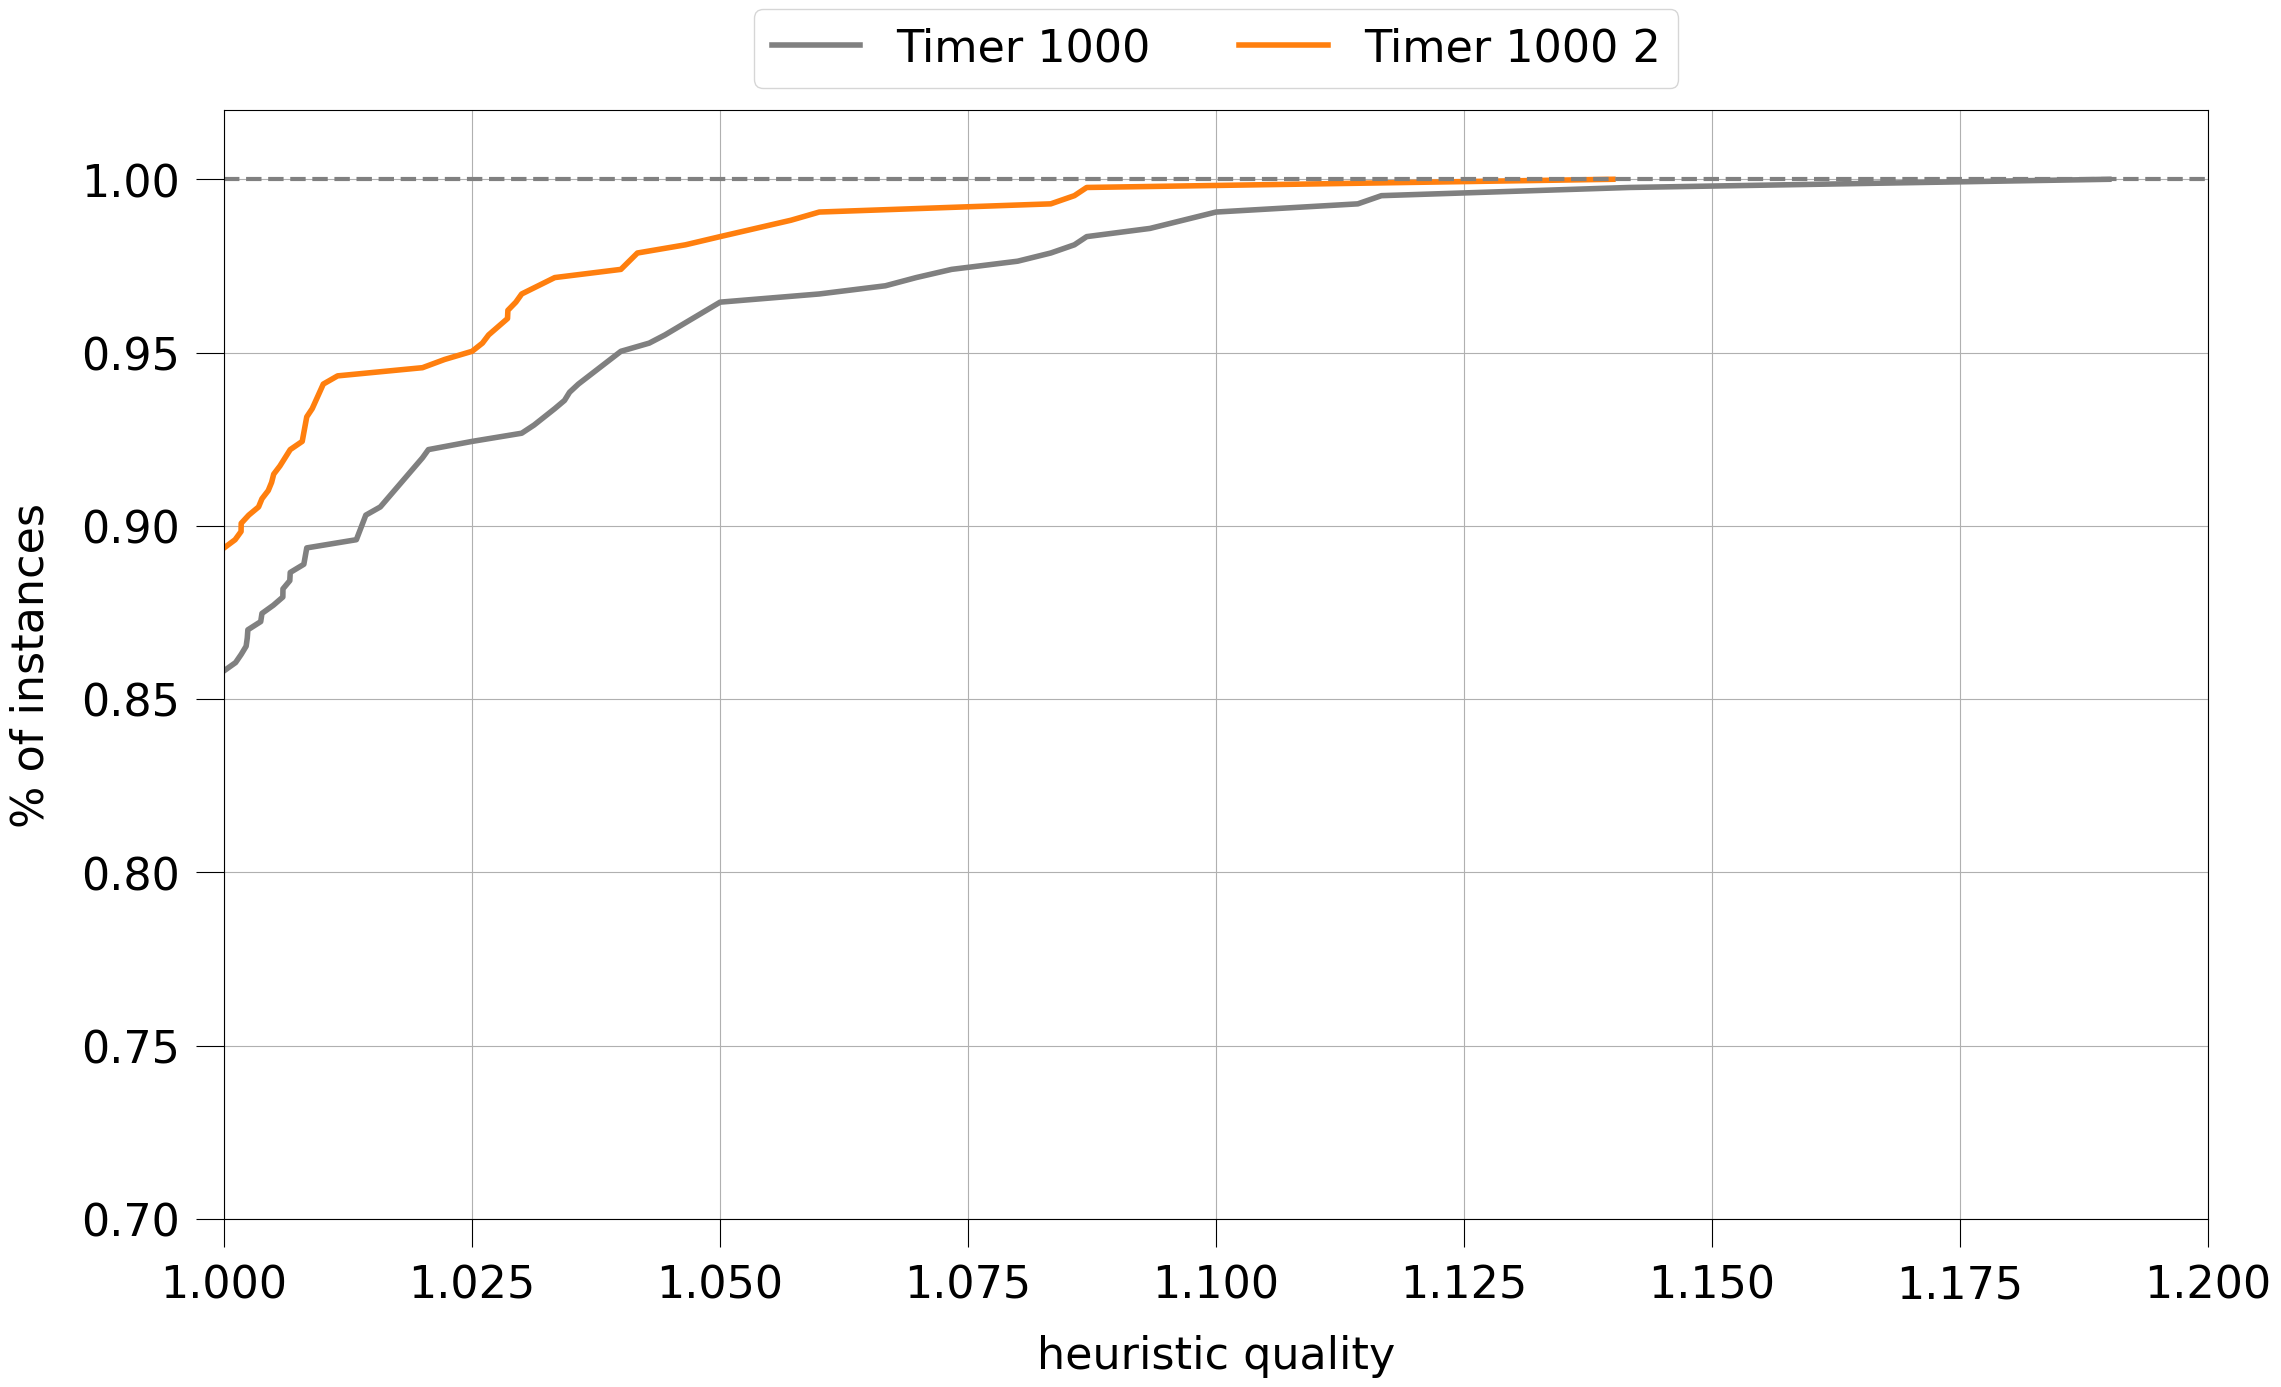

In [44]:
# Calculate percentage dataframes
df_0_perc = get_heuristic_percentage_df(dfh_v8)
df_1_perc = get_heuristic_percentage_df(dfh_v9)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_0_perc['percentage_solved'], c='gray', linewidth='4', label='Timer 1000')
ax.plot(df_1_perc['percentage_solved'], c='tab:orange', linewidth='4', label='Timer 1000 2')

ax.set_xlabel('heuristic quality', labelpad=20)
ax.set_ylabel('% of instances', labelpad=20)
ax.set_xlim([1.0, 1.2])
ax.set_ylim([0.7, 1.02])
#ax.set_xscale('log')
#ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
#ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
#ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
#ax.text(185000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v5/DFVSTimerHeuristicLinePlot.png',  bbox_inches='tight')
fig.show()

# Heuristic box plot

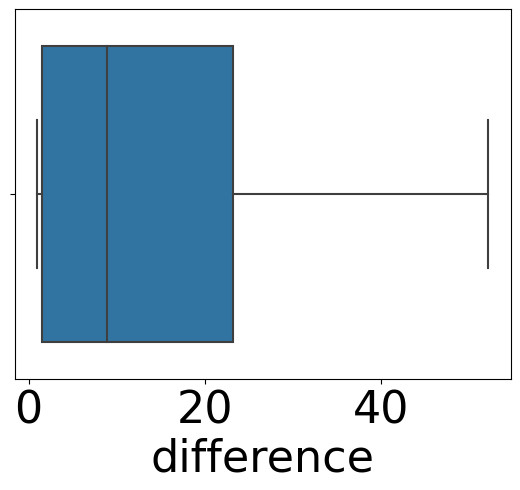

In [45]:
ax = sns.boxplot(x=dfh_a1["difference"])